In [4]:
import pandas as pd

#load the data data_w_genres.csv
data_w_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_w_genres.csv')
#print data head
print(data_w_genres.head())

           genres                                            artists  \
0  ['show tunes']                   "Cats" 1981 Original London Cast   
1              []                          "Cats" 1983 Broadway Cast   
2              []        "Fiddler On The Roof” Motion Picture Chorus   
3              []     "Fiddler On The Roof” Motion Picture Orchestra   
4              []  "Joseph And The Amazing Technicolor Dreamcoat"...   

   acousticness  danceability    duration_ms    energy  instrumentalness  \
0      0.590111      0.467222  250318.555556  0.394003          0.011400   
1      0.862538      0.441731  287280.000000  0.406808          0.081158   
2      0.856571      0.348286  328920.000000  0.286571          0.024593   
3      0.884926      0.425074  262890.962963  0.245770          0.073587   
4      0.510714      0.467143  270436.142857  0.488286          0.009400   

   liveness   loudness  speechiness       tempo   valence  popularity  key  \
0  0.290833 -14.448000     0.210

In [5]:
# Check for missing values
print(data_w_genres.isnull().sum())

# Get a summary of the dataset
print(data_w_genres.describe())

genres              0
artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64
       acousticness  danceability   duration_ms        energy  \
count  28680.000000  28680.000000  2.868000e+04  28680.000000   
mean       0.498373      0.546490  2.388780e+05      0.497488   
std        0.370614      0.176474  1.211318e+05      0.254885   
min        0.000000      0.000000  1.879550e+04      0.000000   
25%        0.122296      0.431000  1.823304e+05      0.283568   
50%        0.478458      0.557000  2.186400e+05      0.504000   
75%        0.896000      0.675000  2.684670e+05      0.702783   
max        0.996000      0.986000  5.403500e+06      1.000000   

       instrumentalness      liveness      loudne

# Data Preprocessing
# stabdardize the data by scaling the numerical columns

In [28]:
import pandas as pd

data_w_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_w_genres.csv')

# Replace empty lists with the string 'Unknown'
data_w_genres['genres'] = data_w_genres['genres'].apply(lambda x: 'Unknown' if x == '[]' else x)

# Check again for empty lists
empty_lists = data_w_genres['genres'].apply(lambda x: x == 'Unknown').sum()
print(f"Number of 'Unknown' genre entries: {empty_lists}")

# check for [] values in genres column
print(data_w_genres['genres'].head())

Number of 'Unknown' genre entries: 9857
0    ['show tunes']
1           Unknown
2           Unknown
3           Unknown
4           Unknown
Name: genres, dtype: object


In [29]:
from sklearn.preprocessing import StandardScaler

# Fit and transform the data
scaler = StandardScaler()

# select features to scale

features_to_scale = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Scale the features

data_w_genres[features_to_scale] = scaler.fit_transform(data_w_genres[features_to_scale])

# print the head of the data
print(data_w_genres.head())


           genres                                            artists  \
0  ['show tunes']                   "Cats" 1981 Original London Cast   
1         Unknown                          "Cats" 1983 Broadway Cast   
2         Unknown        "Fiddler On The Roof” Motion Picture Chorus   
3         Unknown     "Fiddler On The Roof” Motion Picture Orchestra   
4         Unknown  "Joseph And The Amazing Technicolor Dreamcoat"...   

   acousticness  danceability  duration_ms    energy  instrumentalness  \
0      0.247535     -0.449184     0.094449 -0.406013         -0.547439   
1      0.982617     -0.593635     0.399588 -0.355776         -0.313665   
2      0.966517     -1.123156     0.743352 -0.827512         -0.503226   
3      1.043025     -0.688023     0.198242 -0.987591         -0.339037   
4      0.033301     -0.449634     0.260532 -0.036105         -0.554140   

   liveness  loudness  speechiness     tempo   valence  popularity  key  mode  \
0  0.627425 -0.573060     1.039205  0.066

# EDA

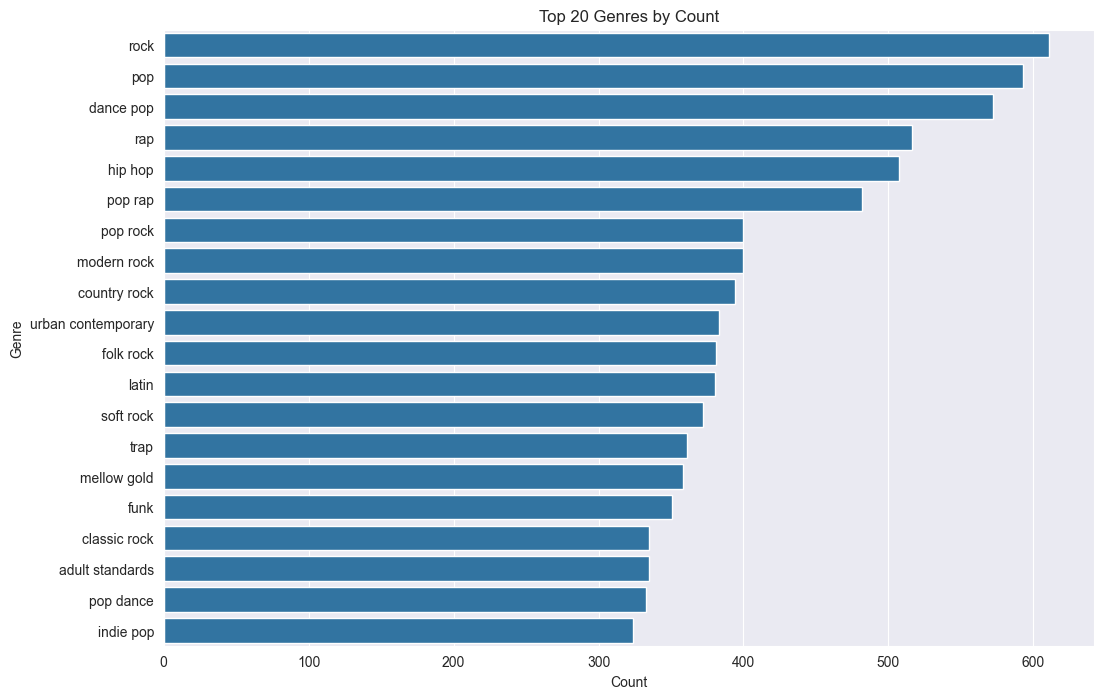

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast  # Abstract Syntax Trees

# Load your data
data_w_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_w_genres.csv')

# Convert the 'genres' column to actual lists (if they are not already)
data_w_genres['genres'] = data_w_genres['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Flatten the genre lists into one list
all_genres = [genre for sublist in data_w_genres['genres'] for genre in sublist]

# Count each genre's occurrence
genre_counts = Counter(all_genres)

# Create a DataFrame for the counts
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values('Count', ascending=False)

# Plot the top 20 genres by count
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=genre_df.head(20))
plt.title('Top 20 Genres by Count')
plt.show()
